In [28]:
import webbrowser
import requests
from bs4 import BeautifulSoup 
import numpy as np
import pandas as pd


resp=requests.get("https://www.weather.go.kr/weather/observation/currentweather.jsp")
resp.status_code

bs=BeautifulSoup(resp.text,'lxml')

In [29]:
bs

<!DOCTYPE html>
<html lang="ko">
<head>
<meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
<title>도시별 현재날씨 &gt; 지상관측자료 &gt; 관측자료 &gt; 날씨 &gt; 기상청 </title>
<link href="https://www.kma.go.kr/iphone-shortcut.png" rel="shortcut icon"/>
<link href="https://www.kma.go.kr/iphone-shortcut.png" rel="apple-touch-icon-precomposed"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<link href="/share/css/base.css?ver=20191226" rel="stylesheet" type="text/css"/>
<link href="/share/css/common.css?ver=20191226" rel="stylesheet" type="text/css"/>
<link href="/share/css/weather-layout.css?ver=20191226" rel="stylesheet" type="text/css"/>
<link href="/share/css/component.css?ver=20191226" rel="stylesheet" type="text/css"/>
<link href="/share/css/add_2018.css?ver=20191226" rel="stylesheet" type="text/css"/>
<link href="/share/css/weather-obs.css?ver=20191226" rel="stylesheet" type="text/css"/>
<script src="/share/js/jquery-1.7.1.min.js"></script>
<script src="/share/js/weather-comm

In [30]:
table=bs.find("table", class_="table_develop3")  

In [31]:
data=[]

table.find_all('tr')

for tr in table.find_all('tr') :
    tds= list(tr.find_all('td'))
    
    for td in tds :
        if td.find('a'):
            point=td.find('a').text #어느지점
            temp=tds[5].text
            moist=tds[9].text
            
            data.append([point,temp,moist])
            
print(data)

[['강릉', '22.1', '93'], ['강진군', '26.4', '91'], ['강화', '25.8', '79'], ['거제', '22.4', '97'], ['거창', '23.7', '98'], ['경주시', '22.5', '92'], ['고산', '26.7', '97'], ['고창', '28.3', '83'], ['고창군', '27.8', '82'], ['고흥', '27.1', '87'], ['광양시', '26.6', '87'], ['광주', '26.7', '98'], ['구미', '23.4', '99'], ['군산', '26.2', '88'], ['금산', '24.5', '91'], ['김해시', '23.3', '95'], ['남원', '24.5', '98'], ['남해', '26.9', '85'], ['대관령', '18.2', '98'], ['대구', '23.3', '86'], ['대전', '25.3', '95'], ['동두천', '26.5', '79'], ['동해', '20.0', '97'], ['목포', '27.8', '87'], ['문경', '22.4', '99'], ['밀양', '23.1', '94'], ['백령도', '24.6', '84'], ['보령', '25.0', '90'], ['보성군', '27.8', '91'], ['보은', '23.7', '88'], ['봉화', '22.3', '89'], ['부산', '22.1', '95'], ['부안', '26.4', '94'], ['부여', '26.5', '86'], ['북강릉', '21.7', '91'], ['북창원', '25.2', '95'], ['북춘천', '26.2', '78'], ['산청', '25.4', '93'], ['상주', '22.8', '100'], ['서귀포', '26.2', '99'], ['서산', '24.6', '93'], ['서울', '25.3', '84'], ['성산', '28.4', '85'], ['세종', '25.7', '84'], ['속초', '21.5', '9

### 데이터를 csv 파일로 저장하기 .waether.csv

In [53]:
weather=pd.DataFrame(data,columns=['location','temp','moist'])

In [54]:
weather

,location,temp,moist
0,강릉,22.1,93
1,강진군,26.4,91
2,강화,25.8,79
3,거제,22.4,97
4,거창,23.7,98
...,...,...,...
90,합천,24.0,96
91,해남,25.9,96
92,홍성,24.5,94
93,홍천,25.1,80


In [55]:
weather.to_csv("weather.cvs")

In [ ]:
# weather=pd.DataFrame(data,index=datacolumns=['location','temp','moist'])

### 저장한 파일을 불러서 dataFrame 만들기 & 출력 (앞에 다섯개만)

In [56]:
df_weather=pd.read_csv("weather.cvs")

In [57]:
df_weather

,Unnamed: 0,location,temp,moist
0,0,강릉,22.1,93
1,1,강진군,26.4,91
2,2,강화,25.8,79
3,3,거제,22.4,97
4,4,거창,23.7,98
...,...,...,...,...
90,90,합천,24.0,96
91,91,해남,25.9,96
92,92,홍성,24.5,94
93,93,홍천,25.1,80


In [58]:
df_weather.head()

,Unnamed: 0,location,temp,moist
0,0,강릉,22.1,93
1,1,강진군,26.4,91
2,2,강화,25.8,79
3,3,거제,22.4,97
4,4,거창,23.7,98


### 몇개의 지역의 데이터만 모아보기!!
- ex) 서울, 인천 등 원하는 도시 7개만 보기 

In [78]:
df_weather.loc[1:10:2]

,Unnamed: 0,location,temp,moist
1,1,강진군,26.4,91
3,3,거제,22.4,97
5,5,경주시,22.5,92
7,7,고창,28.3,83
9,9,고흥,27.1,87


### 기온 습도 데이터로 그래프 그려보기

In [81]:
import matplotlib.pyplot as plt

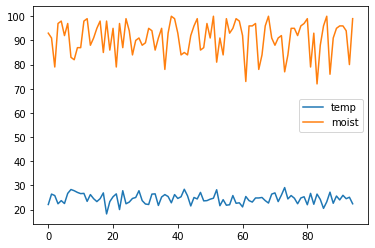

In [95]:
plt.plot(df_weather['temp'])
plt.plot(df_weather['moist'])
plt.legend(['temp','moist'])
plt.show() 


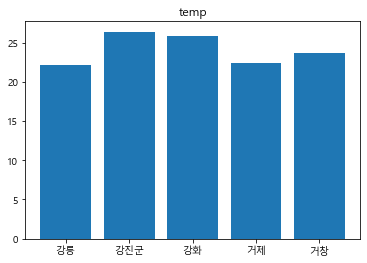

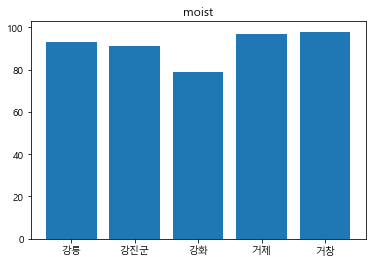

In [107]:
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']='False'  #한글 쓸수 있게

df_weather2=df_weather.head()
index=list(df_weather2['location'])
b=list(df_weather2['temp'])

plt.bar(index,b)
plt.title('temp')
plt.show()

index=list(df_weather2['location'])
b=list(df_weather2['moist'])

plt.bar(index,b)
plt.title('moist')
plt.show()

### DB에 저장해보기